<a href="https://colab.research.google.com/github/SighanoCel/My-data-science-project/blob/main/House_rent_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# importing python liabraries to clean, analyze and visualize data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# loading the raw datset.

df= pd.read_csv('/content/drive/MyDrive/Keaggle datasets project/House_Rent_Dataset.csv')

df.head()

In [ ]:
df=df.drop(['Posted On','Point of Contact'],axis=1)

In [ ]:
# this code is necessary to understand some informations about the data such as the type of the features
df.info()

In [ ]:
# asking for information about the numerical features to get statistical insight such as the mean, the standard deviation etc.

df.describe()

In [ ]:
# checking the correlation between the numerical fetures and the renting price,
#that will be used as the label when training the model for predictions.
# the features most correlated to the label is the number of bathroom this can explain its influence over the renting price of a house.

df.corr(numeric_only=True)['Rent']

In [ ]:
# this Subplots algorithm helps to visualize and identify
# the potential outliers within the previews correlations, that can affect the performance of our model.


fig,ax= plt.subplots(nrows=1,ncols=4,figsize=(15,4))

ax[0].plot(df['Size'],df['Rent'],'+',markersize=7,)
ax[0].set_xlabel('SIZE')
ax[0].set_ylabel('RENT')

ax[1].plot(df.BHK, df.Rent, 'o',markersize=3)
ax[1].set_xlabel('BHK')
ax[1].set_ylabel('RENT')

ax[2].plot(df.Bathroom,df.Rent,'*', markersize=4)
ax[2].set_xlabel('BATHROOM')
ax[2].set_ylabel('RENT')
ax[3].plot(df.Rent, '+', markersize=5, color='green')

plt.tight_layout()

In [ ]:
# after the visualization above, we can identify the outliers based on the linear distribution
# of the dataset. Datapoints which do not follow the SIze/Bathroom-Renting price general trend have to be dropped.
# let's assign them to a varibale in order to drop them from the dataset.

outlier1= df[(df['Size']<3000) & (df['Rent']>1500000)]
outliers2= df[(df['Size']>5000) & (df['Rent']<500000)]

In [ ]:
# dropping the identified outliers

df= df.drop(outlier1.index)
df=df.drop(outliers2.index)

In [ ]:
len(df)

In [ ]:
# Visualizing the new dataset correlations subplots, helps to evaluate the current linear distribution of the datapoints.


fig,ax= plt.subplots(nrows=1,ncols=4,figsize=(15,4))

ax[0].plot(df['Size'],df['Rent'],'+',markersize=7,)
ax[0].set_xlabel('SIZE')
ax[0].set_ylabel('RENT')

ax[1].plot(df.BHK, df.Rent, 'o',markersize=3)
ax[1].set_xlabel('BHK')
ax[1].set_ylabel('RENT')

ax[2].plot(df.Bathroom,df.Rent,'*', markersize=4)
ax[2].set_xlabel('BATHROOM')
ax[2].set_ylabel('RENT')
ax[3].plot(df.Rent, '+', markersize=5, color='green')
ax[3].set_xlabel('RENT')

plt.tight_layout()

In [ ]:
# with the label(Rent) Boxplot, we notice that there are several datapoints
# which are very far, beyong the average of the label.
# but we decide to remove those who are beyong 800000 $ as renting price.


plt.figure(figsize=(12,4))

sns.boxplot(x=df['Rent']);

#plt.xlim(600000,800000)

In [ ]:
# Dropping the new outliers an define the new dataframe

df=df.drop(df[df['Rent']>650000].index)

len(df.index)

In [ ]:

plt.figure(figsize=(12,4))

sns.boxplot(x=df['Rent']);

In [ ]:
fig,ax= plt.subplots(nrows=1,ncols=4,figsize=(15,4))

ax[0].plot(df['Size'],df['Rent'],'+',markersize=7,)
ax[0].set_xlabel('SIZE')
ax[0].set_ylabel('RENT')

ax[1].plot(df.BHK, df.Rent, 'o',markersize=3)
ax[1].set_xlabel('BHK')
ax[1].set_ylabel('RENT')

ax[2].plot(df.Bathroom,df.Rent,'*', markersize=4)
ax[2].set_xlabel('BATHROOM')
ax[2].set_ylabel('RENT')
ax[3].plot(df.Rent, '+', markersize=5, color='green')

plt.tight_layout()

CATEGORICAL DATA PROCESSING

In [ ]:
df.head()

In [ ]:
# loading the datset glossary that will help to understand the meaning of the features.

with open('/content/drive/MyDrive/Keaggle datasets project/Dataset Glossary.txt','r') as f:

  print(f.read())

In [ ]:
# Using the barplot helps to visualize mean and the standard deviation of the Rent prise
# based on the city where the flat is located. This helps to encode the df['City'] categorical feature in digit,
# in order to perfom the Machine learning task.


plt.figure(figsize=(4,5))
sns.barplot(df,y='Rent',hue='City')

In [ ]:
# Using the barplot helps to visualize mean and the standard deviation of the Rent prise
# based on the city where the flat is located. This helps to encode the df['Area Type'] categorical feature in digit.

plt.figure(figsize=(6,5))
sns.barplot(df,y='Rent',hue='Area Type')

In [ ]:
# Using the barplot helps to visualize mean and the standard deviation of the Rent prise
# based on the city where the flat is located. This helps to encode the df['Furnishing Status'] categorical feature in digit.

plt.figure(figsize=(4,5))
sns.barplot(df,y='Rent',hue='Furnishing Status')

In [ ]:
# performing a score encoding on categorical (City, area type and furnishing status).
# The Barplot visulization helped to notice that the values of these features could be
#encoded as scores. for exemple the rent in Mumbai is widely high than the one in Kolkata,
#that is why the rent in Mumby will have a better score than the others



mean_rent_areatype= df.groupby('Area Type')['Rent'].mean()
df['Area Type']= df['Area Type'].map(np.round(mean_rent_areatype,2))


mean_rent_furnstatus= df.groupby('Furnishing Status')['Rent'].mean()
df['Furnishing Status']= df['Furnishing Status'].map(np.round(mean_rent_furnstatus,2))


mean_rent_city= df.groupby('City')['Rent'].mean()
df['City']= df['City'].map(np.round(mean_rent_city,2))

In [ ]:
df.head()

In [ ]:
# This code snippet performs frequency encoding
# on the other categorical features ('Floor', 'Area Locality', and 'Tenant Preferred')
# the frequency encoding is used rather thant the one-hot encoding, because the latter
# will increase the number of features, knowing that these features have a high number of unique values.


floor_freq_encoding = df['Floor'].value_counts()
df['Floor'] = df['Floor'].map(floor_freq_encoding)


arealo_freq_encoding= df['Area Locality'].value_counts()
df['Area Locality'] = df['Area Locality'].map(arealo_freq_encoding)

tenant_freq_encoding= df['Tenant Preferred'].value_counts()
df['Tenant Preferred'] = df['Tenant Preferred'].map(tenant_freq_encoding)

In [ ]:

df.head()

MACHINE LEARNING TASK

In [ ]:
# creating a separated dataframe identical to 'df' , that we will use it only for
# training the model and make predictions.

data = df

data

ML. MODEL TRAINING AND PRICE PREDICTIONS

In [129]:
# importing the various Sklearn libraries to perform the ML

from sklearn.preprocessing import StandardScaler,Normalizer,PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import ElasticNetCV, RidgeCV, LassoCV,LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, get_scorer_names,r2_score

In [ ]:
# This code separates the features (independent variables) and the target variable (dependent variable)
# for the machine learning model.

X= data.drop('Rent',axis=1)

y= data['Rent']

In [ ]:
# After this code runs, the X variable will contain the standardized feature data.
# the independent variable will be setted on the same scale in order
# to avoid overfitting of our ML model

scaler= StandardScaler()

X= scaler.fit_transform(X)

In [127]:
# This process helps to evaluate how well a linear regression model with different polynomial degrees
# fits the data and identify potential overfitting or underfitting by comparing the training and test RMSE.
# by this method we will be able to make an efficient bias-variance trade off, and find the best polynomial degree.
# as this algorithm only helps to check the best polynom degree, the polynomial converter, the model and the dataset split
# are all provisory. that is why we named them as 'raw' or 'r'.


train_rmse_error=[]
test_rmse_error=[]

for deg in range (1,10):

  raw_poly_converter= PolynomialFeatures(degree=deg, include_bias=False)
  raw_poly_features=raw_poly_converter.fit_transform(X)

  rX_train,rX_test, ry_train, ry_test= train_test_split(raw_poly_features,y,random_state=42,test_size=0.3)

  raw_model=LinearRegression()
  raw_model.fit(rX_train,ry_train)

  train_pred= raw_model.predict(rX_train)
  test_pred= raw_model.predict(rX_test)

  train_rmse= np.sqrt(mean_squared_error(ry_train,train_pred))
  test_rmse= np.sqrt(mean_squared_error(ry_test,test_pred))

  train_rmse_error.append(train_rmse)
  test_rmse_error.append(test_rmse)

In [ ]:
# Based on the plot, it appears that a polynomial degree of 3 might be a good choice
# as the test RMSE seems to be minimized around that point,
# and the gap between training and test RMSE is relatively small.

plt.plot(range(1,10),train_rmse_error[:10], label='TRAIN_rmse')

plt.plot( range(1,10),test_rmse_error[:10],label='TEST_rmse')

plt.xlabel('degré du polynome')
plt.ylabel('RMSE')
plt.xlim(1,8)
plt.legend();

In [ ]:
# After choosing the best degree, we set the final polynomial and Linear regression model with the polynom 3,
# to fit and make the prediction

polyconverter= PolynomialFeatures(degree=3, include_bias=False)

polyfeatures= polyconverter.fit_transform(X)

X_train,X_test,y_train,y_test = train_test_split(polyfeatures,y,random_state=42,test_size=0.3)

model=LinearRegression(fit_intercept=False,positive=True)

model.fit(X_train,y_train)

prediction= model.predict(X_test)

In [ ]:
# Here we have the best RMSE to ensure that our model is performant and not overfitted.

RMSE= np.sqrt(mean_squared_error(y_test,prediction))

RMSE

In [134]:
# the error represents about  67% of the average of the total value of our dataset label
# which isn't perfect. But we realize that the r2_score is about the 78% which is fair as prediction

print('Rmse/average_rent_price =',RMSE/ data.Rent.mean()*100)

print('R2_score =', r2_score(y_test,prediction)*100)




Rmse/average_rent_price = 65.79217888612095
R2_score = 78.58172122411113


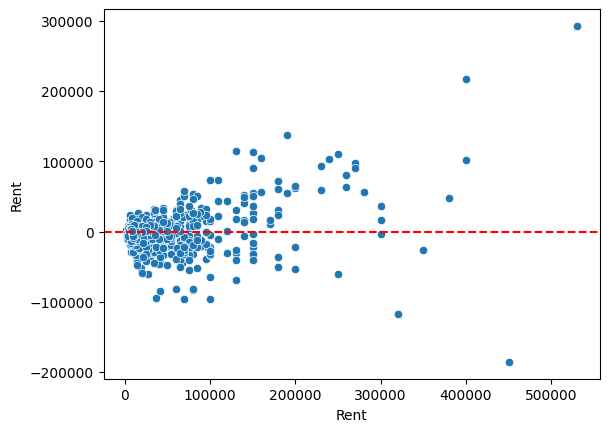

In [135]:
# This code generates a scatter plot to visualize the residuals
# (the difference between the actual and predicted rent prices).
# it uses also the matplotlib axhline which epresents the ideal scenario where the residuals are zero,
# meaning the predictions exactly match the actual values.
# the scatter plot helps to visually assess the model's performance and identify any patterns in the errors.


test_rediduals= y_test-prediction

sns.scatterplot(x=y_test, y= test_rediduals)

plt.axhline(y=0, color ='red', ls='--');

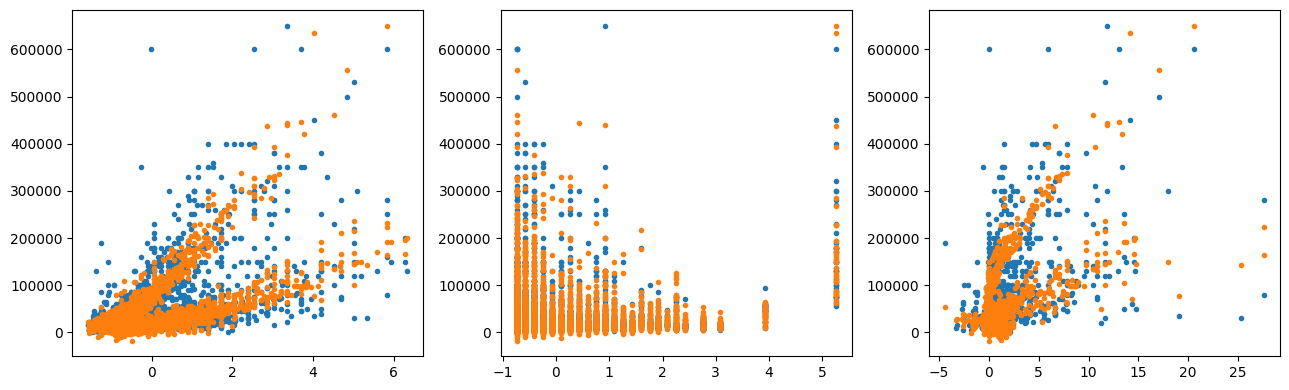

In [138]:
# This visualization helps to see how well the model's predictions
# align with the actual data for different polynomial transformations of the original features.

fig, ax= plt.subplots(1,3, figsize=(13,4))

ax[0].plot(polyfeatures[:,1],data.Rent,'o',markersize=3)
ax[0].plot(polyfeatures[:,1],model.predict(polyfeatures),'o',markersize=3)

ax[1].plot(polyfeatures[:,4],data.Rent,'o',markersize=3)
ax[1].plot(polyfeatures[:,4],model.predict(polyfeatures),'o',markersize=3)

ax[2].plot(polyfeatures[:,10],data.Rent,'o',markersize=3)
ax[2].plot(polyfeatures[:,10],model.predict(polyfeatures),'o',markersize=3)

plt.tight_layout()



In conclusion, the model is well fitted, even if the prediction could be more precise. however, we can said that our model is dicreetely fair, but performant as well and need to be improved by adjusting parameters, or to be replaced by a better one. look forward to improve new parameters or new model for this same datset.

Thank you